### 의료 비용 개인 데이터 세트
##### 선형 회귀를 이용한 보험 예측

https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

나이: 1차 수혜자의 나이

성별: 보험 계약자 성별, 여성, 남성

bmi: 신체에 대한 이해를 제공하는 체질량 지수, 신장에 비해 상대적으로 높거나 낮은 체중, 신장
과 체중의 비율을 이용한 객관적인 체중 지수(kg/m^2), 이상적으로는 18.5~24.9

children: 건강보험이 적용되는 자녀 수 / 피부양자 수

흡연자: 흡연

지역: 수혜자의 미국 거주 지역, 북동부, 남동부, 남서부, 북서부.

요금: 건강 보험에서 청구하는 개별 의료 비용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/405/my_study/Python_Study/0515~16/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
# 어떤 정보?
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [3]:
# 크기
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# 결측치 확인
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# 어떤 정보? object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# object 변경
df_in=df.copy()

In [9]:
# object 변환
df_in['sex']=df_in["sex"].replace({'female':0, 'male':1})
df_in['smoker']=df_in["smoker"].replace({'no':0, 'yes':1})
df_in['region']=df_in["region"].replace({'northeast':0, 'southeast':1, 'southwest':2, 'northwest':3 })
df_in

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


In [10]:
# 변경완료
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [11]:
df_in.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

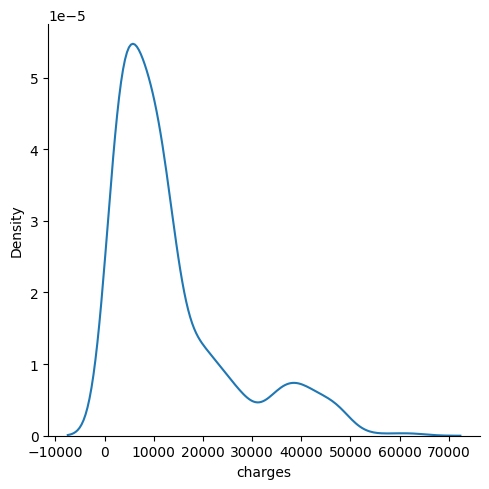

In [12]:
# KDE(커널밀도추정)시각화
sns.displot(df_in, x='charges', kind='kde') # charges 곡선으로 시각화

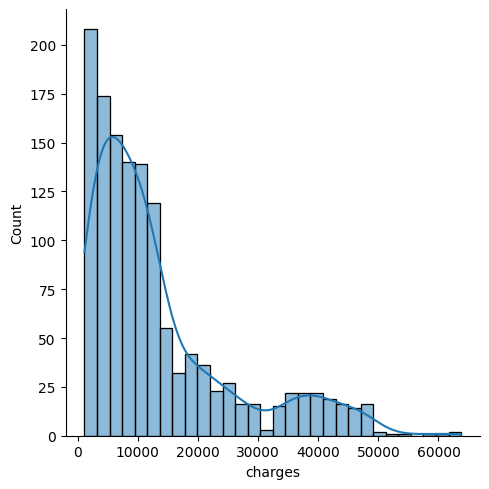

In [13]:
sns.displot(df_in, x='charges', kde=True) # 특정값이 과하게 크다면 kde 그래프가 데이터를 제대로 나타내지 못하는 것

In [14]:
# 관계성 알아보기
corr=df_in.corr() # 열끼리 상관관계
corr.shape

(7, 7)

In [15]:
df_in=df_in[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
corrMatt = df_in.corr()
print(corrMatt)
mask = np.array(corrMatt)
#Return the indices for the upper-triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)] = False 

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002613  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185 -0.009346  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750 -0.054428  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.036617  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.044124  0.787251
region    0.002613 -0.009346 -0.054428  0.036617 -0.044124  1.000000 -0.050226
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.050226  1.000000


<Axes: >

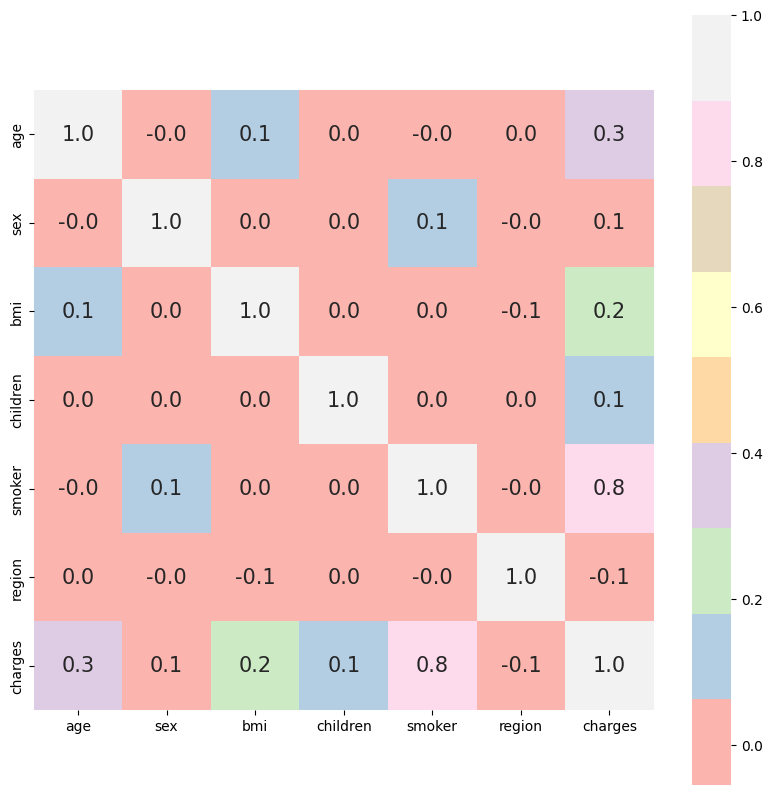

In [16]:
plt.figure(figsize=(10,10)) # 히트맵그리기
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Pastel1')
# 컬러바표시, 정사각형 히트맵, 왜?소수점아래 한자리까지?, 히트맵의상관관계값

<Axes: xlabel='region', ylabel='charges'>

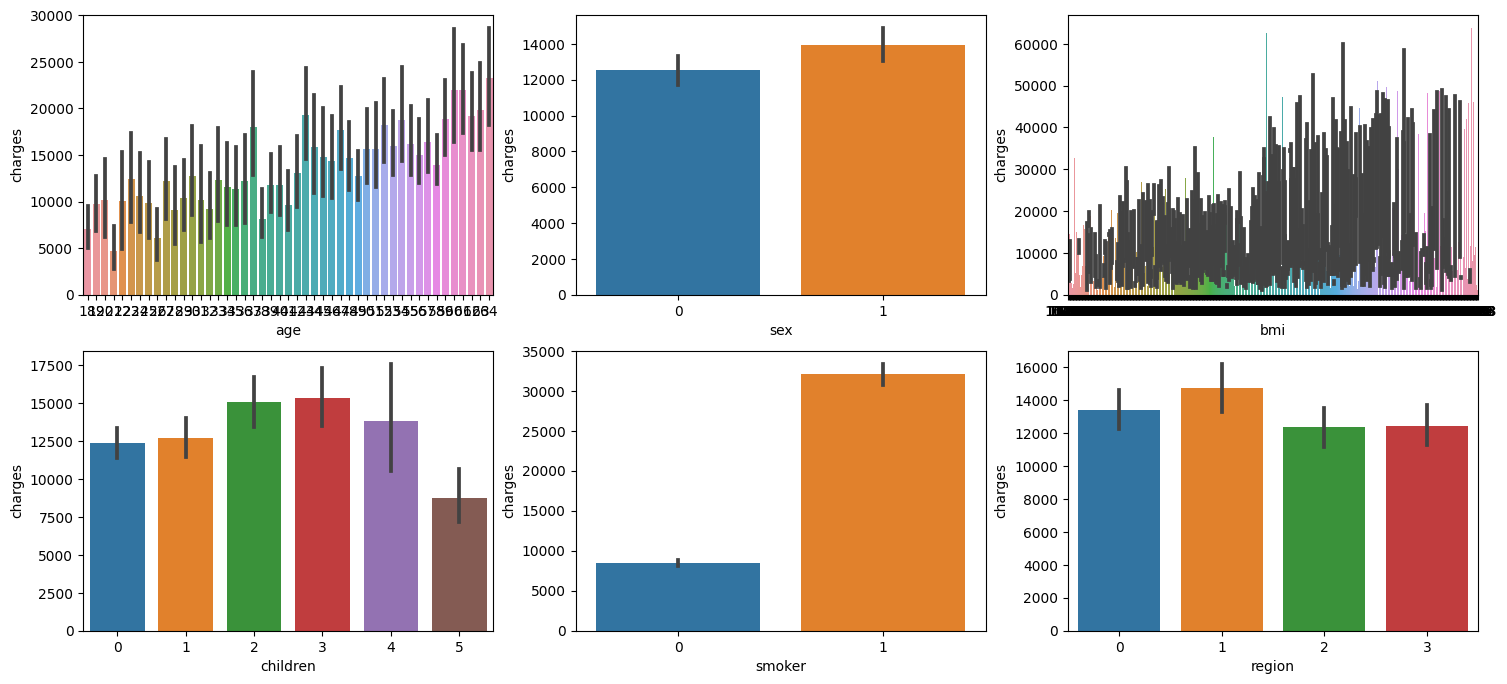

In [17]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.barplot(data=df_in,x='age',y='charges',ax=ax1)
sns.barplot(data=df_in,x='sex',y='charges',ax=ax2)
sns.barplot(data=df_in,x='bmi',y='charges',ax=ax3)
sns.barplot(data=df_in,x='children',y='charges',ax=ax4)
sns.barplot(data=df_in,x='smoker',y='charges',ax=ax5)
sns.barplot(data=df_in,x='region',y='charges',ax=ax6)

<Axes: xlabel='region', ylabel='charges'>

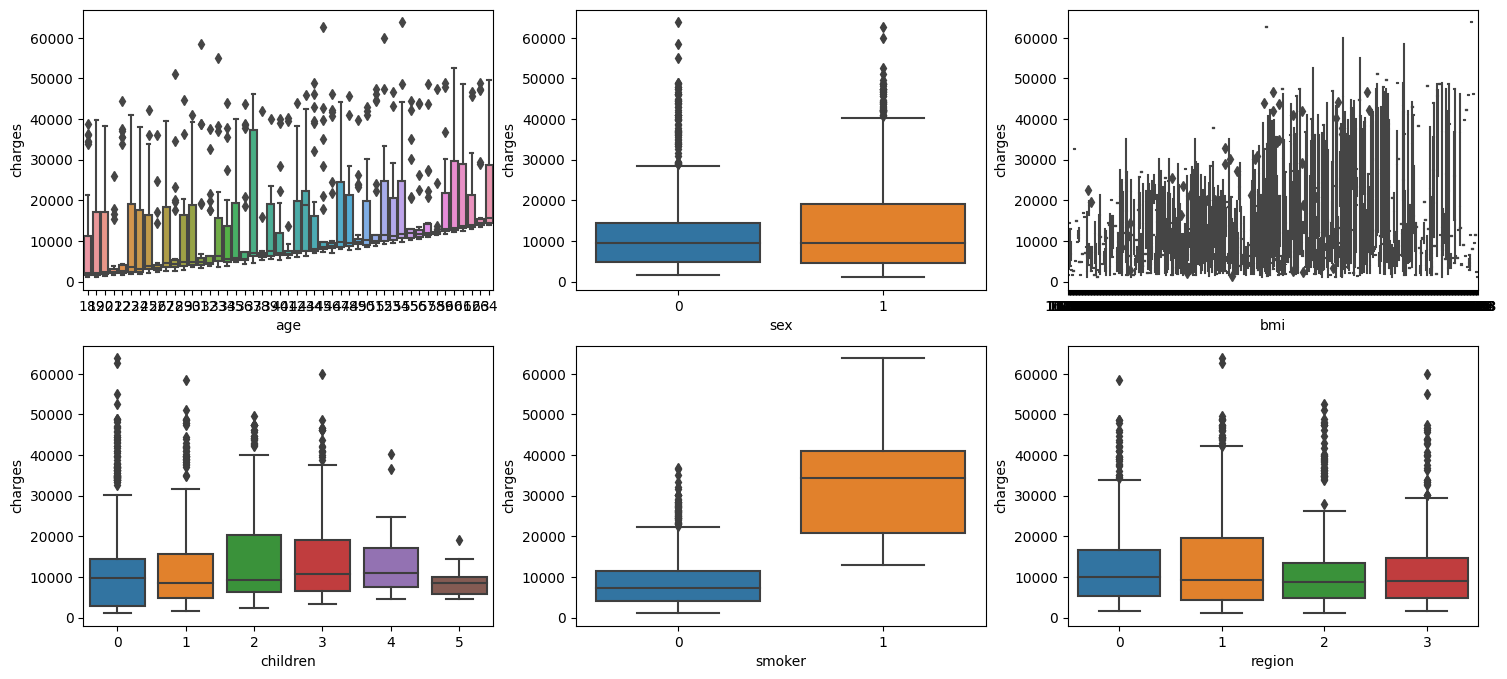

In [18]:
fig,axes=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.boxplot(data=df_in,y='charges',x='age', orient='v', ax=axes[0][0])
sns.boxplot(data=df_in,y='charges',x='sex', orient='v', ax=axes[0][1])
sns.boxplot(data=df_in,y='charges',x='bmi', orient='v', ax=axes[0][2])
sns.boxplot(data=df_in,y='charges',x='children', orient='v', ax=axes[1][0])
sns.boxplot(data=df_in,y='charges',x='smoker', orient='v', ax=axes[1][1])
sns.boxplot(data=df_in,y='charges',x='region', orient='v', ax=axes[1][2])

<Axes: xlabel='region', ylabel='charges'>

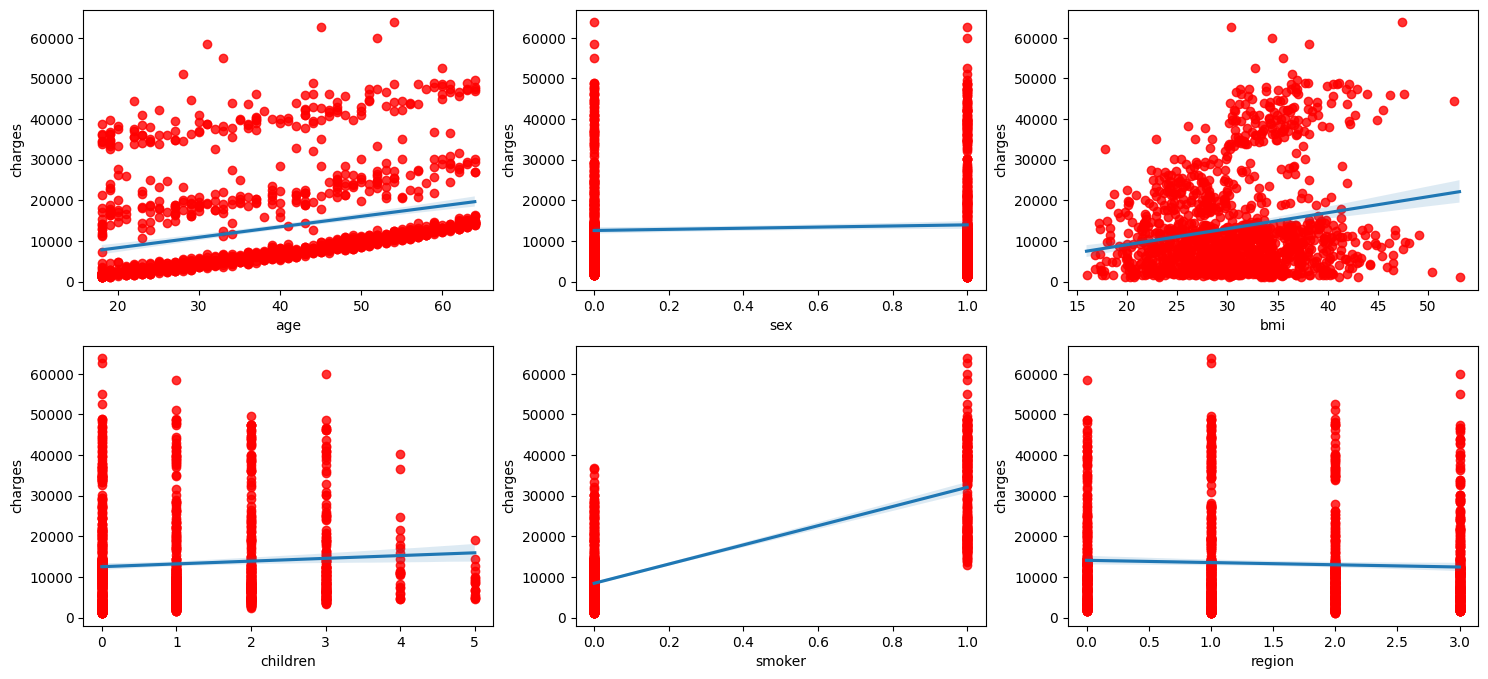

In [19]:
fig,axes=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
sns.regplot(x='age',y='charges',data=df_in,ax=axes[0][0], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='sex',y='charges',data=df_in, ax=axes[0][1], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='bmi',y='charges',data=df_in, ax=axes[0][2], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='children',y='charges',data=df_in, ax=axes[1][0], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='smoker',y='charges', data=df_in, ax=axes[1][1], scatter_kws={"fc":"r", "ec":"r"})
sns.regplot(x='region',y='charges', data=df_in, ax=axes[1][2], scatter_kws={"fc":"r", "ec":"r"})

<Axes: xlabel='region', ylabel='bmi'>

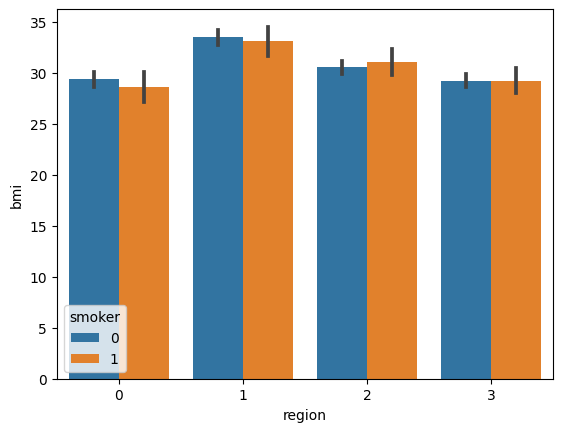

In [20]:
sns.barplot(x='region', y='bmi', hue='smoker', data=df_in)

<Axes: xlabel='region', ylabel='charges'>

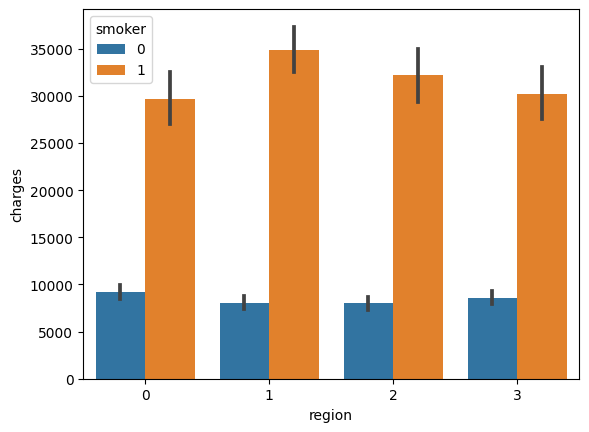

In [21]:
sns.barplot(x='region', y='charges', hue='smoker', data=df_in)

<Axes: xlabel='region', ylabel='charges'>

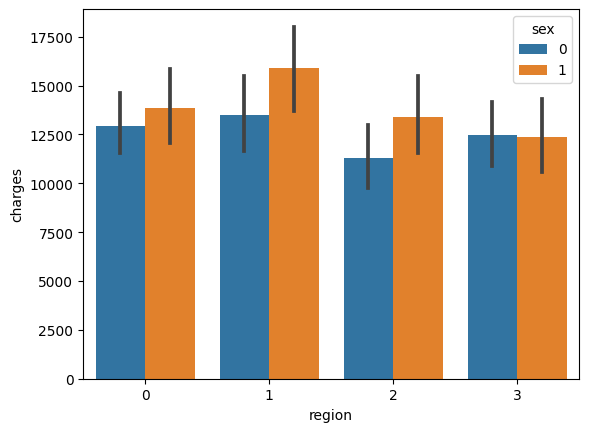

In [22]:
sns.barplot(x='region', y='charges', hue='sex', data=df_in)

- 개인 보험 비용 가설
  1. 나이 : 나이가 들수록 높을 것이다.
  2. 성별 : 차이가 없을 것이다.
  3. bmi : bmi가 높을수록 많이 들 것이다.
  4. 피부양자(자녀) : 자녀수가 많을수록 높을것이다.
  5. 흡연자 : 흡연을 할수록 높을 것이다.
  6. 지역 : 지역에 따라 보험정책이 다를 것이다.

In [23]:
# 이상치 제거
count_q1=np.percentile(df_in['charges'],25)
print("Q1(25%):",count_q1)
count_q3=np.percentile(df_in['charges'],75)
print("Q3(75%):",count_q3)
count_IQR=count_q3-count_q1
print("IQR:",count_IQR)
df_IQR=df_in[(df_in['charges']>=(count_q1-(1.5*count_IQR)))& 
                        (df_in['charges']<=(count_q3+(1.5*count_IQR)))]
print(df_IQR)

Q1(25%): 4740.28715
Q3(75%): 16639.912515
IQR: 11899.625365
      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       2  16884.92400
1      18    1  33.770         1       0       1   1725.55230
2      28    1  33.000         3       0       1   4449.46200
3      33    1  22.705         0       0       3  21984.47061
4      32    1  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       3  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       1   1629.83350
1336   21    0  25.800         0       0       2   2007.94500
1337   61    0  29.070         0       1       3  29141.36030

[1199 rows x 7 columns]


<Axes: >

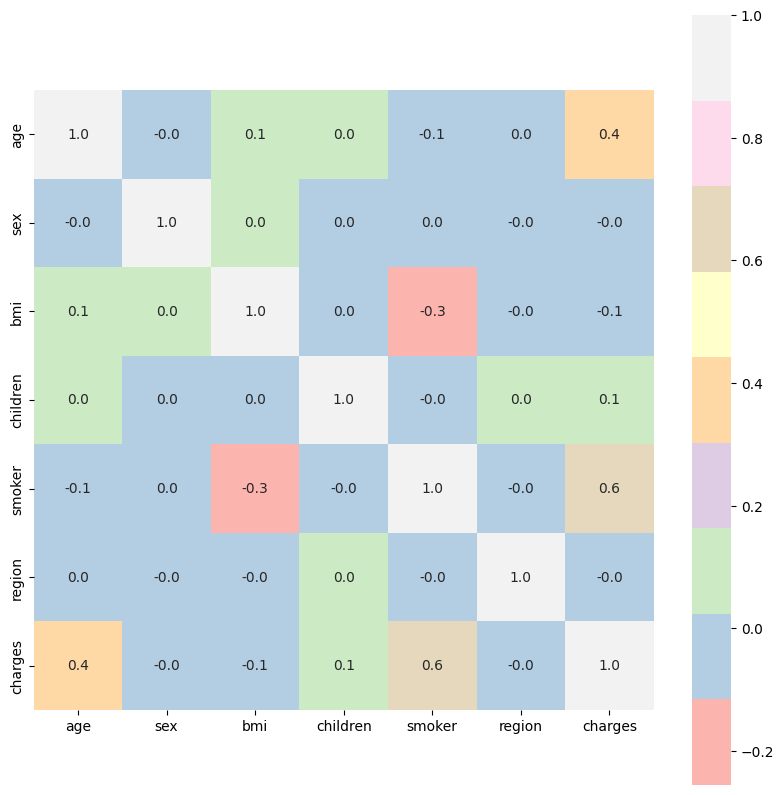

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df_IQR.corr(), fmt='.1f', annot=True, cmap='Pastel1',square=True)

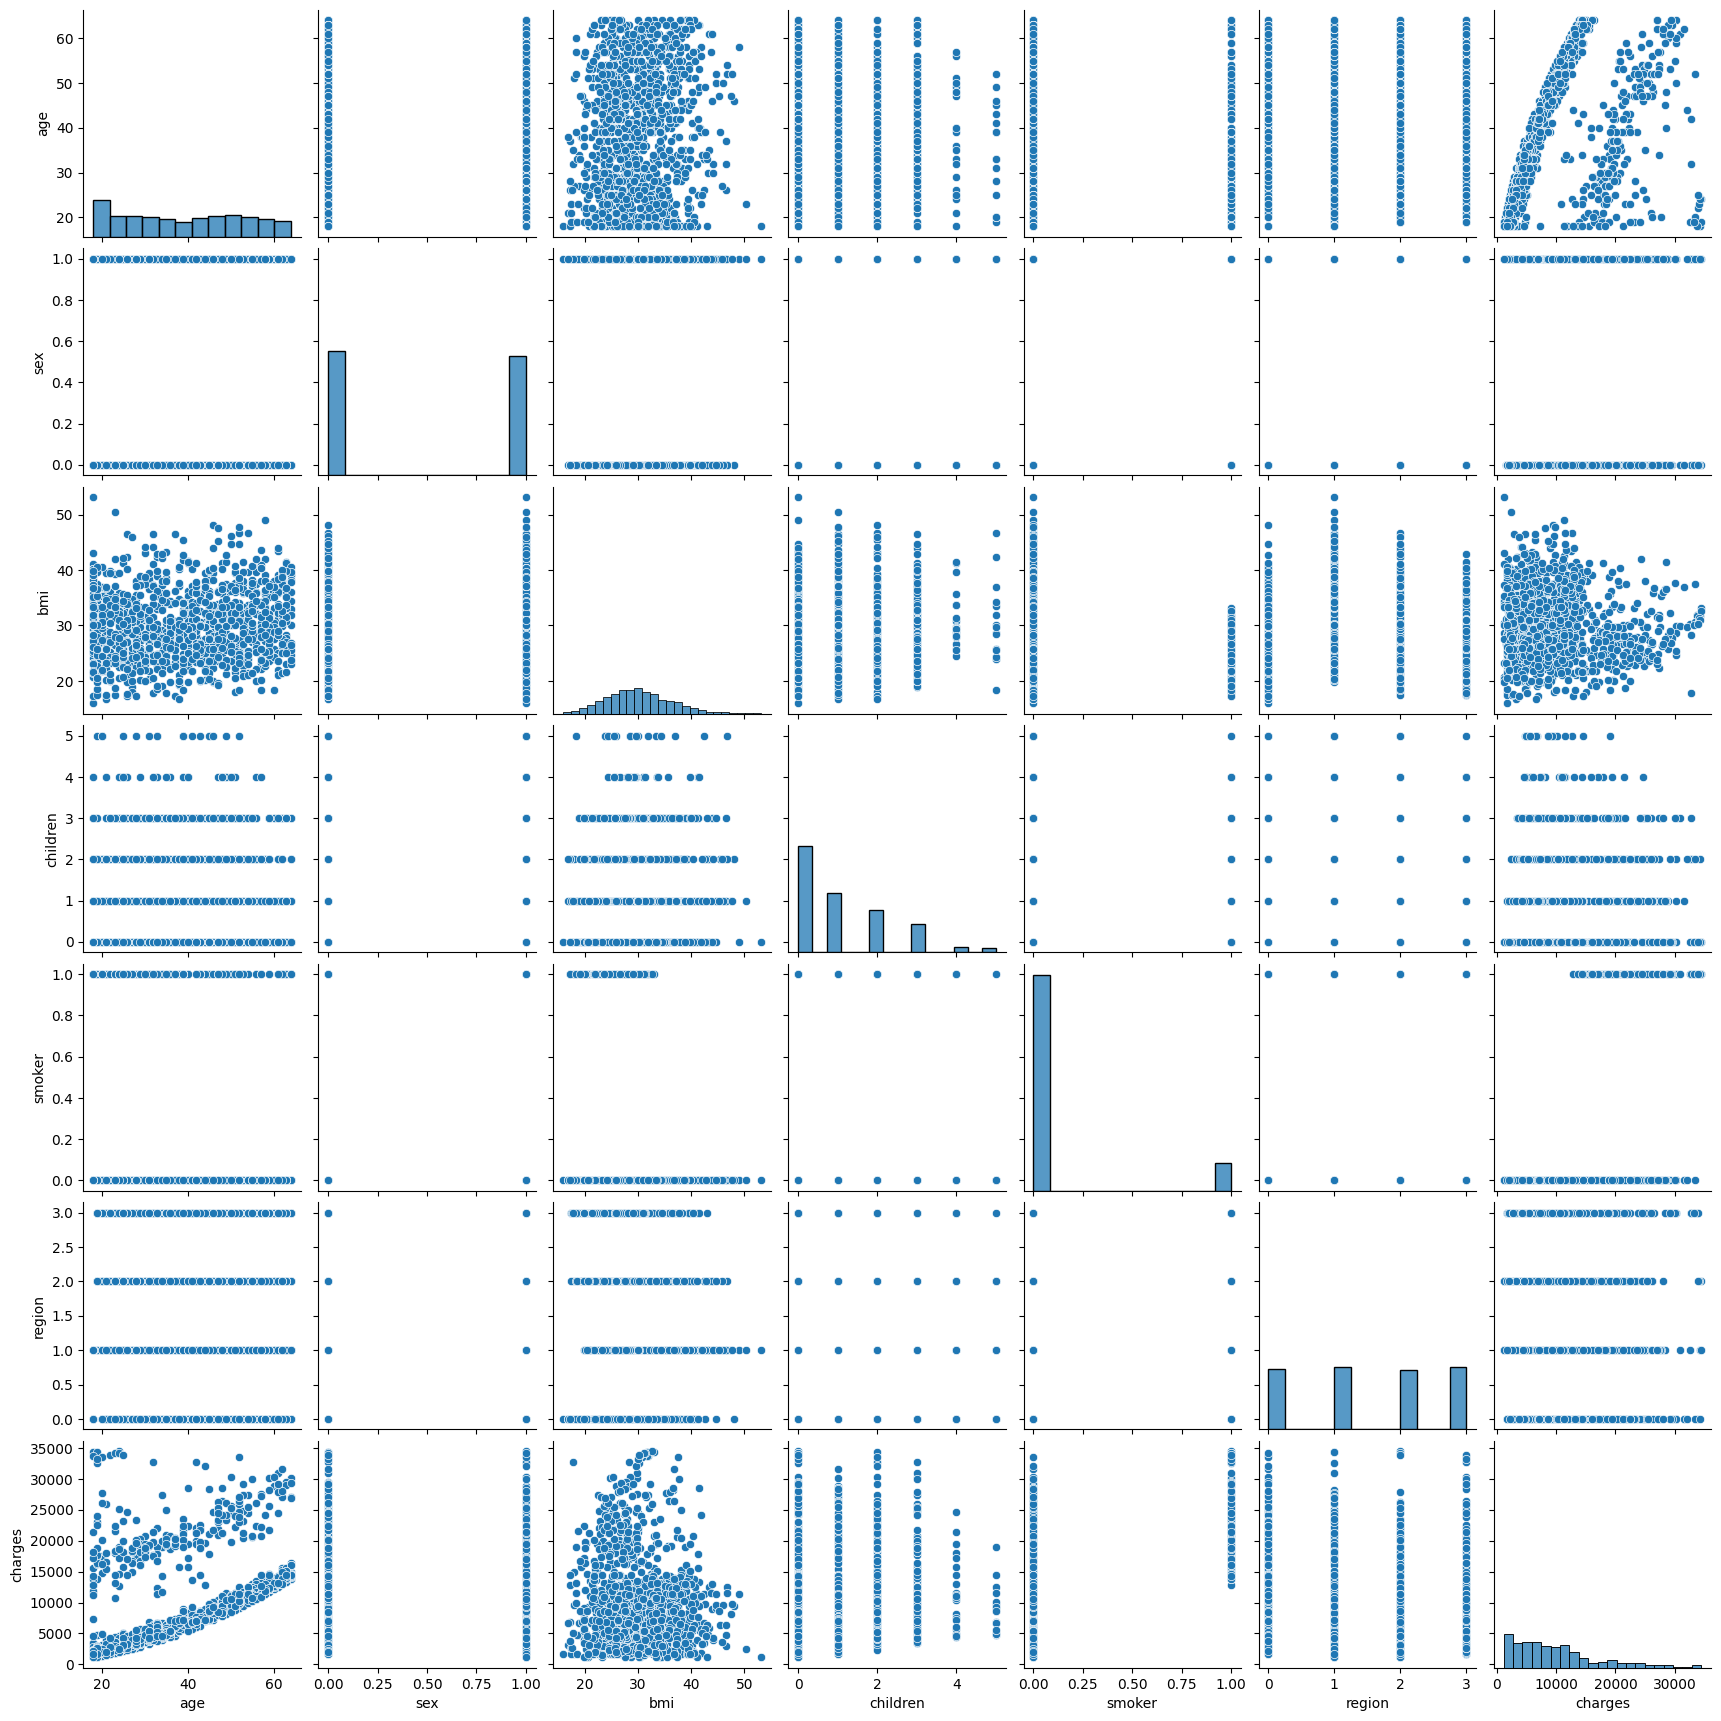

In [25]:
sns.pairplot(df_IQR)

<Axes: xlabel='region', ylabel='charges'>

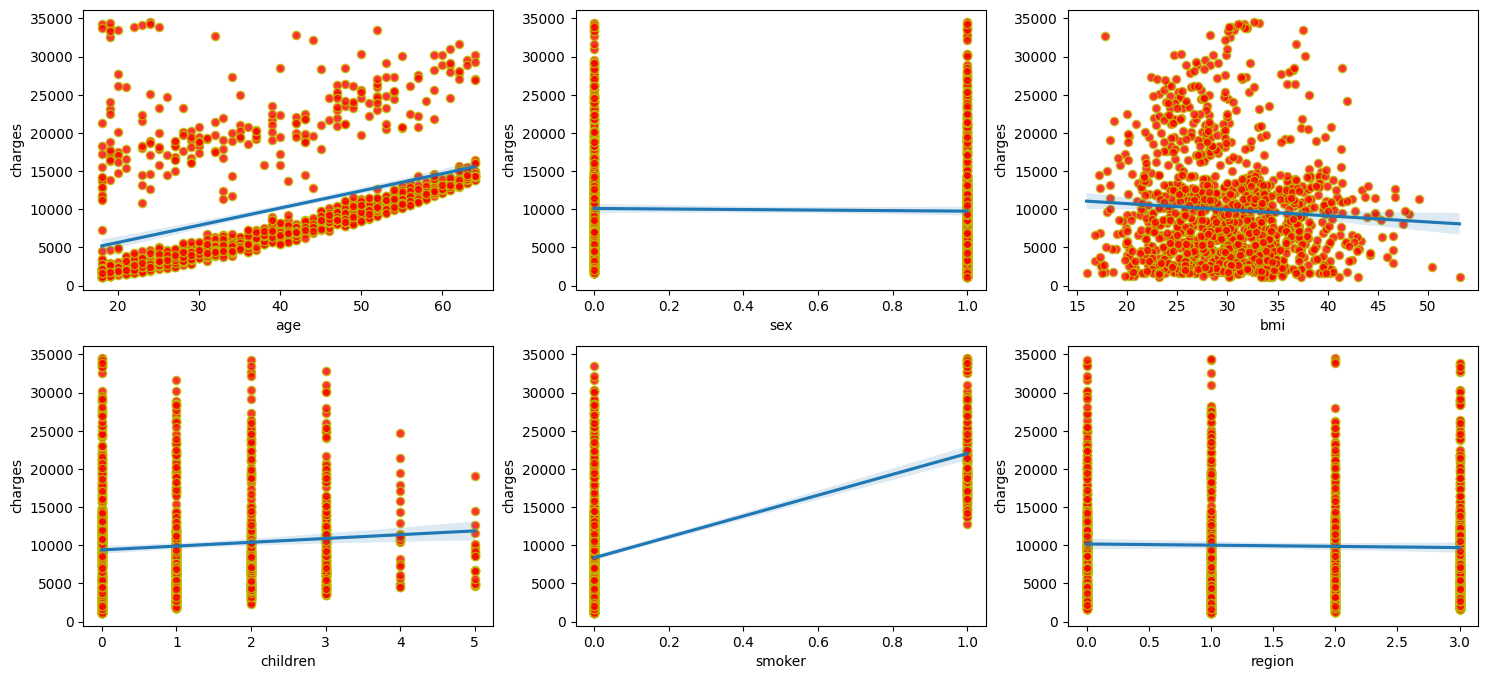

In [26]:
fig,axes=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)
sns.regplot(x='age',y='charges',data=df_IQR,ax=axes[0][0], scatter_kws={"fc":"r", "ec":"y"})
sns.regplot(x='sex',y='charges',data=df_IQR, ax=axes[0][1], scatter_kws={"fc":"r", "ec":"y"})
sns.regplot(x='bmi',y='charges',data=df_IQR, ax=axes[0][2], scatter_kws={"fc":"r", "ec":"y"})
sns.regplot(x='children',y='charges',data=df_IQR, ax=axes[1][0], scatter_kws={"fc":"r", "ec":"y"})
sns.regplot(x='smoker',y='charges', data=df_IQR, ax=axes[1][1], scatter_kws={"fc":"r", "ec":"y"})
sns.regplot(x='region',y='charges', data=df_IQR, ax=axes[1][2], scatter_kws={"fc":"r", "ec":"y"})

In [27]:
df_in_data=df_in.drop('charges',axis=1)
df_in_target=df_in['charges']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_in_data,
                                                    df_in_target,
                                                    test_size = 0.2,
                                                    random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

df_lr = LinearRegression()
df_lr.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_preds = df_lr.predict(X_train)

- 예측값, 실제값 비교
  - MAE : 실제 값과 예측 값의 차이(0에 가까울수록 좋은 모델)
  - MSE : 실제값과 예측값의 차이를 제곱해 평균화, 특이값있으면 수치증가
  - RMSE : MSE 루트값, 목표 값(정확도)을 얼마나 잘 예측하나 추정
  - r2 : 독립 변수가 종속 변수를 얼마나 잘 설명해주는지 보여주는 지표

In [31]:
mse = mean_squared_error(y_train, y_preds)
mae = mean_absolute_error(y_train, y_preds)
rmse = np.sqrt(mean_squared_error(y_train, y_preds))
r2 = r2_score(y_train, y_preds)

print(f"MSE : {mse : 0.2f}, RMSE : {rmse : 0.3f}, MAE : {mae : 0.3f}")
print(f"예측 R2 값 : {r2: 0.3f}\n")

MSE :  37348959.50, RMSE :  6111.380, MAE :  4205.212
예측 R2 값 :  0.741



In [32]:
y_preds = df_lr.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
r2 = r2_score(y_test, y_preds)

print(f"MSE : {mse : 0.2f}, RMSE : {rmse : 0.3f}, MAE : {mae : 0.3f}")
print(f"실제 R2 값 : {r2: 0.3f}")

MSE :  34011467.48, RMSE :  5831.935, MAE :  4211.922
실제 R2 값 :  0.781


- 회귀분석이란

: 자료 Y를 예측하기 위해 관련 있는 자료들을 추출해서 이들의 상관관계를 분석하고 예측 오류가 가장 적은 값을 구해 최적의 예측값을 찾는 과정입니다.

 

- 회귀분석을 하는 이유

: 변수들 간의 구체적인 함수관계(인과관계나 영향력)를 파악하고 예측하기 위해서 회귀분석을 사용합니다.

 

- 회귀선이란

: 변수들 간의 분포 그래프에서 흩어져 있는 잔차들을 대표하는 선입니다.(오류 값을 가장 최소화한 선)

 

회귀선 = RSS(잔차제곱의합)을 최소화 한 직선

https://colab.research.google.com/drive/11865yzohGm76VucxDbf3x9ELOeRzmRBO?usp=sharing